In [1]:
import ai2thor
import copy
import time
import random
import ai2thor.controller
from datetime import datetime
import cv2
import os
import matplotlib.pyplot as plt
import os
# from utils.mid_level_constants import  scene_start_cheating_init_pose
from jupyter_helper import ENV_ARGS, initialize_arm, only_reset_scene, transport_wrapper, ADITIONAL_ARM_ARGS, execute_command

screen_size=900

ENV_ARGS['width'] = screen_size
ENV_ARGS['height'] = screen_size

camera_third_save_dir = '/Users/kianae/Desktop/visualization_cameras/third_party_camera'
camera_first_save_dir = '/Users/kianae/Desktop/visualization_cameras/first_person'
video_first_save_dir = '/Users/kianae/Desktop/visualization_cameras/videos_first'

os.makedirs(camera_third_save_dir, exist_ok=True)
os.makedirs(camera_first_save_dir, exist_ok=True)
os.makedirs(video_first_save_dir, exist_ok=True)

controller = ai2thor.controller.Controller(**ENV_ARGS, renderDepthImage=True, renderInstanceSegmentation=True)
controller._build.url

thor-OSXIntel64-5afa5633597b12898e12eed528c2332a50bc0f79.zip: [ 100%  18.2 MiB/s]  of 513.MB


'http://s3-us-west-2.amazonaws.com/ai2-thor-public/builds/thor-OSXIntel64-5afa5633597b12898e12eed528c2332a50bc0f79.zip'

In [30]:
def translate(action):
    translation = {
        'MoveArmHeightM': 'j',
        'MoveArmHeightP': 'u',
        'MoveArmXM': 'a',
        'MoveArmXP': 's',
        'MoveArmZM': 'z',
        'MoveArmZP': 'w',
        'MoveArmYM': '4',
        'MoveArmYP': '3',
        'MoveAhead': 'm',
        'RotateRight': 'r',
        'RotateLeft': 'l',
        '':'',
        'Done':'q',
        'PickUp':'p', 
        'Finish': 'q',
        'Drop': 'd',
    }
    return translation[action]

def setup_thirdparty_camera(controller, camera_position):
    controller.step('Pass')
    if len(controller.last_event.third_party_camera_frames) > 0:
        controller.step('UpdateThirdPartyCamera',
            thirdPartyCameraId=0, # id is available in the metadata response
            rotation=camera_position['rotation'],
            position=camera_position['position']
            )
    else:
        controller.step('AddThirdPartyCamera', 
            rotation=camera_position['rotation'], 
            position=camera_position['position'],
            fieldOfView=100)

def run_action_sequence(controller, action_sequence, save_frame=True, object_id=None, target_location=None, logger_number=0, translated=False, seq_num_start = 0):
    picked_up = False
    if translated:
        translated_sequence = action_sequence
    else:
        translated_sequence = [translate(action) for action in action_sequence if action != '']
    for (seq_number, seq) in enumerate(translated_sequence):
        execute_command(controller, seq,ADITIONAL_ARM_ARGS)
        if save_frame:
            save_third_frame(controller, logger_number, seq_number + seq_num_start)
            save_first_frame(controller, logger_number, seq_number + seq_num_start)
                
def save_third_frame(controller, logger_number, seq_number=None):
    frame = controller.last_event.third_party_camera_frames[-1]
    frame = add_border_to_frame(frame)
    if seq_number is None:  
        time_str = datetime.now().strftime("%m_%d_%Y_%H_%M_%S_%f")
    else:
        time_str = str(seq_number)
    img_name = str(logger_number) + '_' + time_str + '.png'
    img_dir = os.path.join(camera_third_save_dir, img_name)
    cv2.imwrite(img_dir, frame[:,:,[2,1,0]])
    

def save_first_frame(controller, logger_number, seq_number=None):
    frame = controller.last_event.frame
    frame = add_border_to_frame(frame)
    if seq_number is None:
        time_str = datetime.now().strftime("%m_%d_%Y_%H_%M_%S_%f")
    else:
        time_str = str(seq_number)
    img_name = str(logger_number) + '_' + time_str + '.png'
    img_dir = os.path.join(camera_first_save_dir, img_name)
    cv2.imwrite(img_dir, frame[:,:,[2,1,0]])
    
def manual_task(scene_name, logger_number =0, final=False, reverse=False, camera_position=None, reset_scene=True):
    if reset_scene:
        only_reset_scene(controller, scene_name)
    setup_thirdparty_camera(controller, camera_position)
    all_actions = []
    actions_ran_so_far = 0
    while(True):
        action = input()
        if not reverse:
            action = translate(action)
        if action == 'q':
            break
        all_actions.append(action)
        
        run_action_sequence(controller, [action], 
                            logger_number=logger_number, translated=True, seq_num_start=actions_ran_so_far)
        actions_ran_so_far += 1
        plt.cla()
        plt.imshow(controller.last_event.frame)
        plt.show()
        
    print(scene_name)
    print(all_actions)
def add_border_to_frame(frame, border_len=10):
    frame = copy.deepcopy(frame)
    frame_shape = frame.shape
    if len(frame_shape) == 3:
        w,h,c = frame.shape
    else:
        w,h = frame.shape
    frame[:border_len] = 0
    frame[:,:border_len] = 0
    frame[-border_len:] = 0
    frame[:,-border_len:] = 0
    return frame

def get_receptacle_locations(countertop_id):
    event = controller.step('GetSpawnCoordinatesAboveReceptacle', objectId=countertop_id, anywhere=True)
    possible_xyz = event.metadata['actionReturn']
    return possible_xyz

r


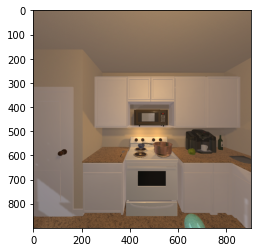

r


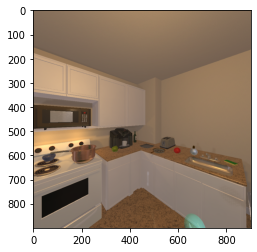

m


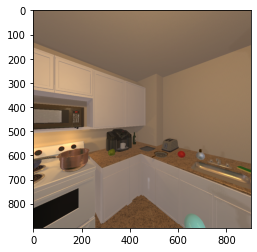

m


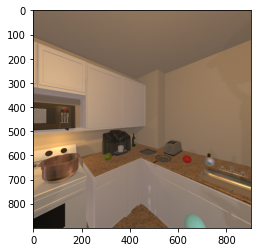

m


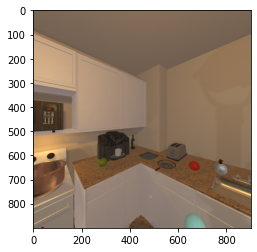

m


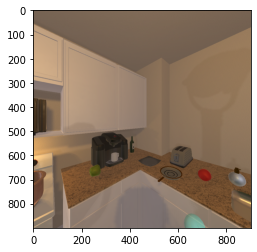

m


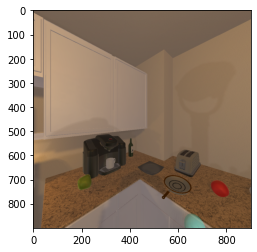

l


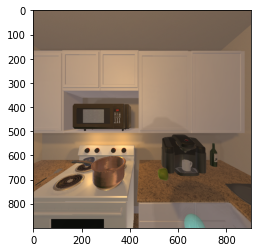

l


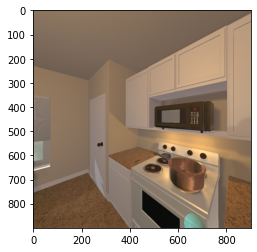

j


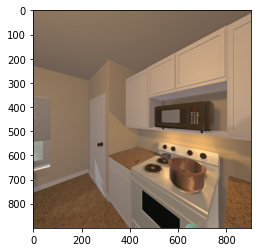

j


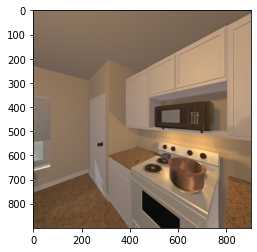

j


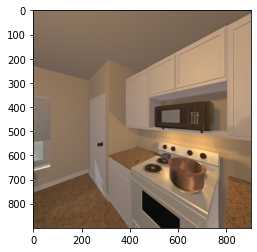

j


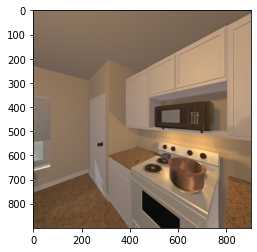

j


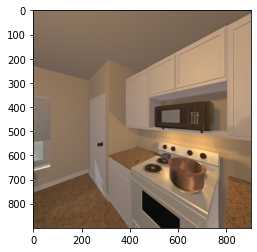

m


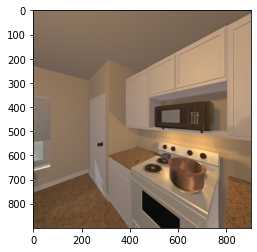

m


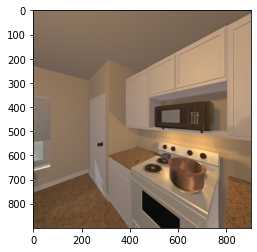

z


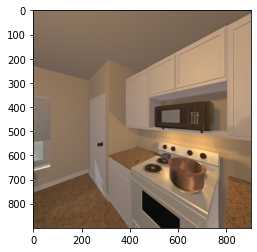

z


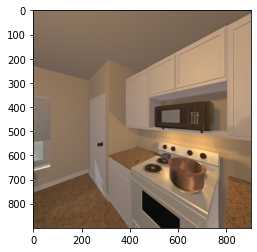

z


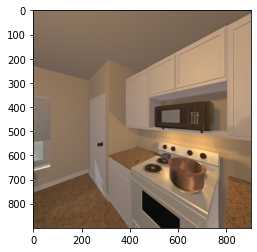

m


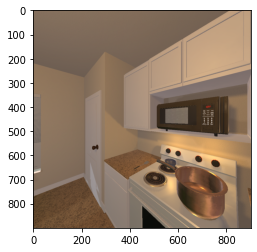

m


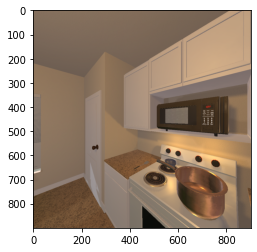

z


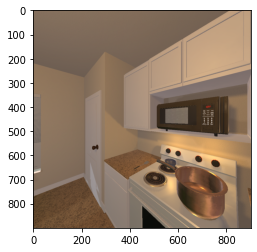

z


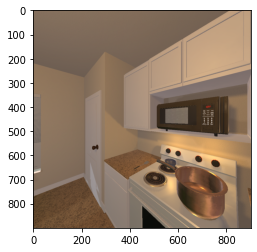

m


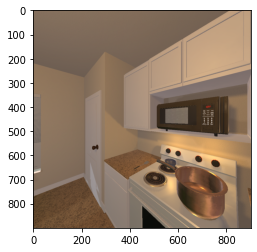

w


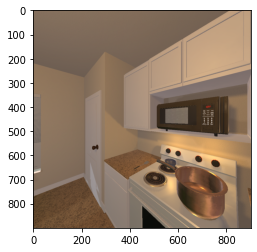

w


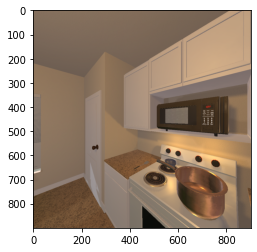

w


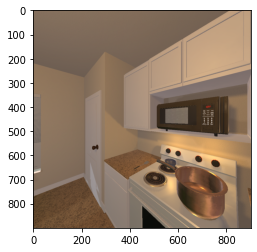

w


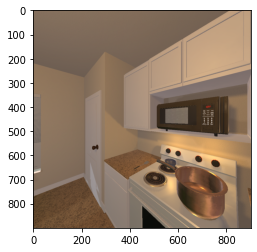

w


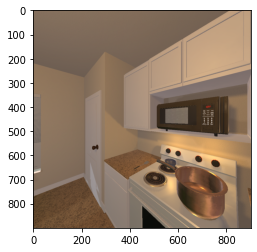

w


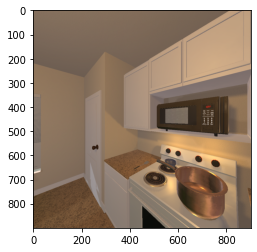

u


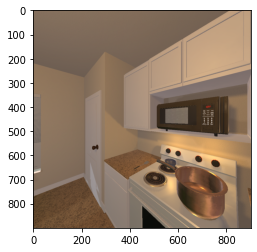

w


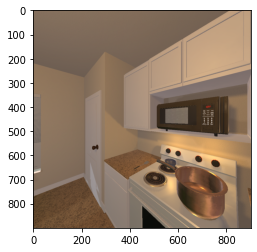

w


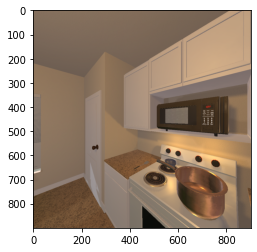

w


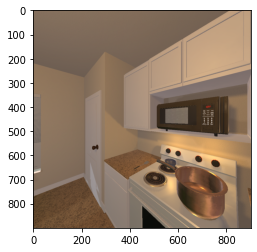

w


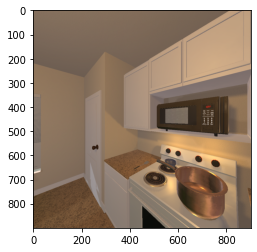

w


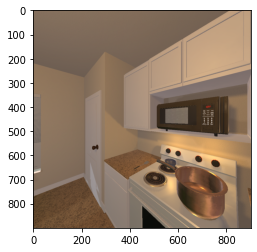

w


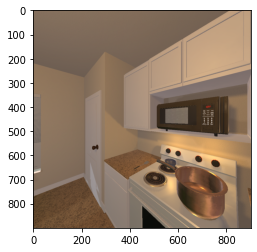

u


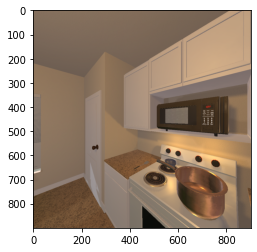

u


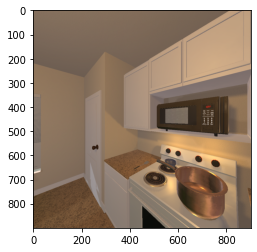

u


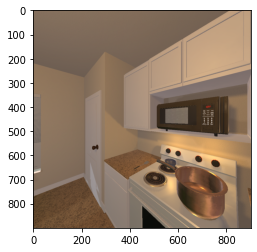

u


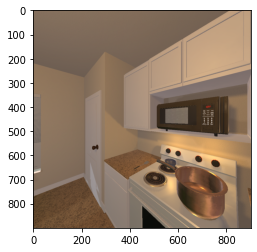

u


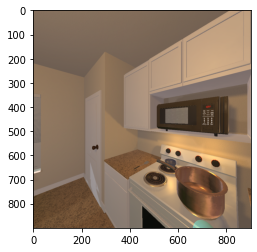

u


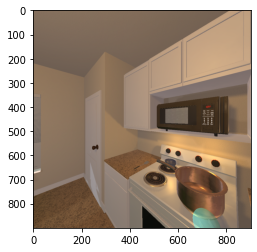

u


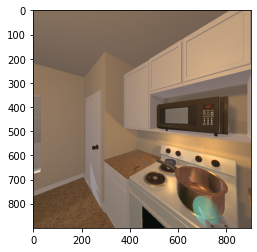

w


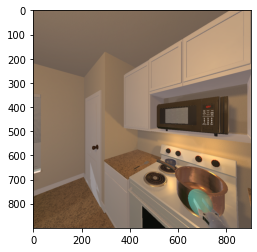

w


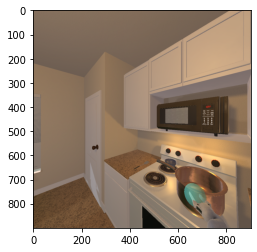

w


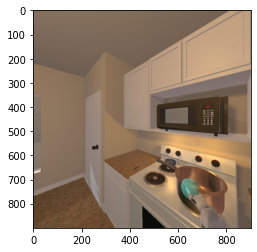

z


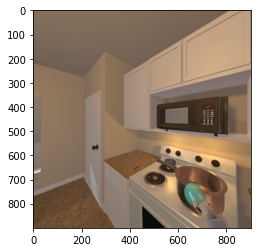

z


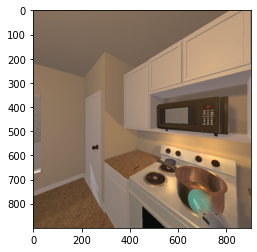

u


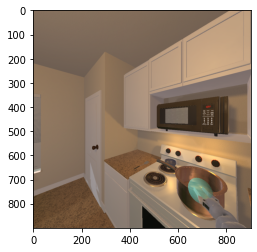

u


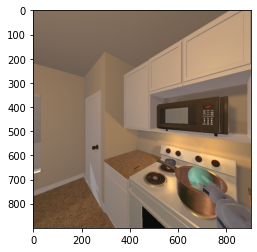

u


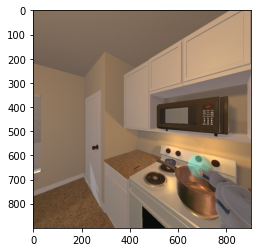

w


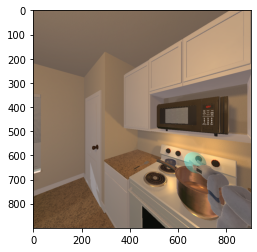

w


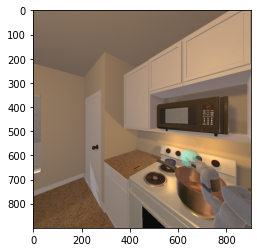

w


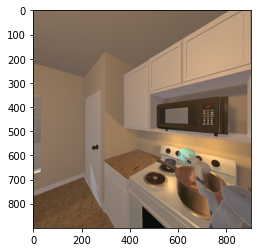

u


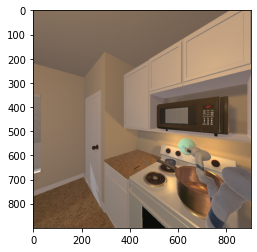

u


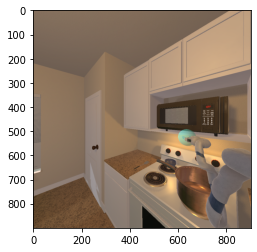

u


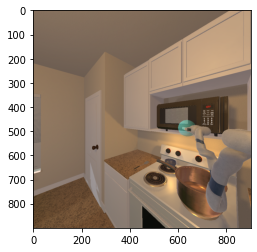

w


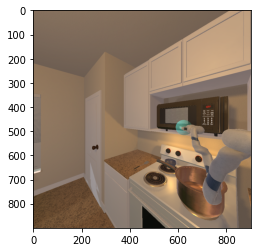

w


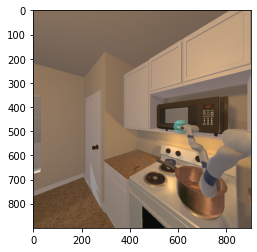

w


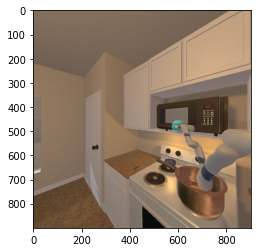

w


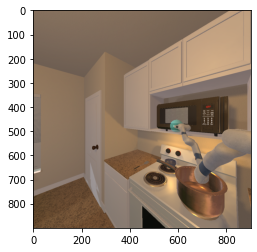

w


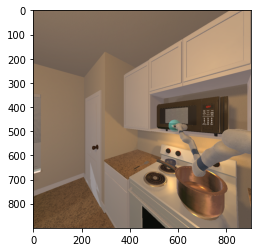

w


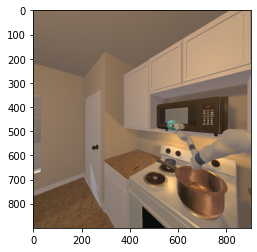

w


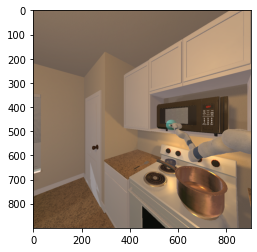

w


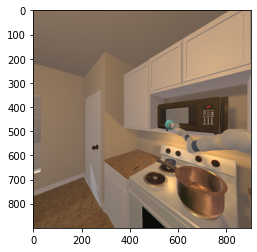

4


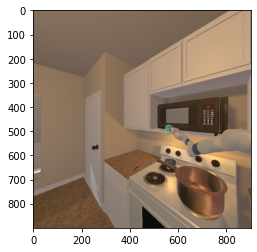

4


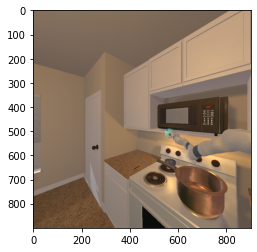

4


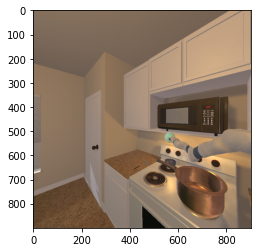

4


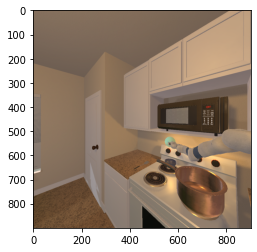

4


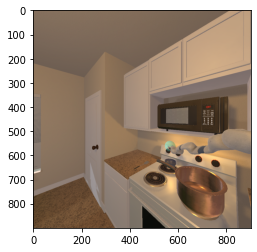

4


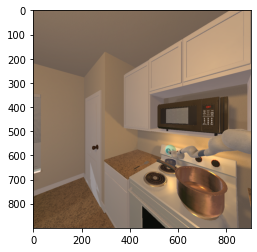

4


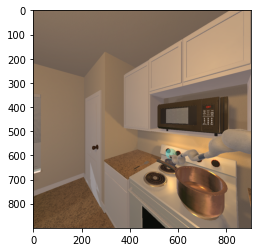

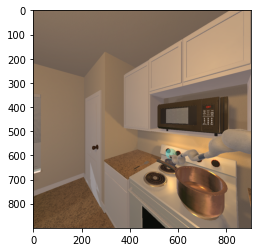

4


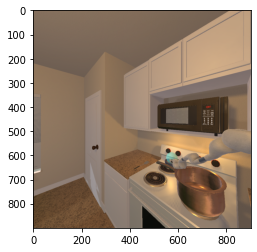

4


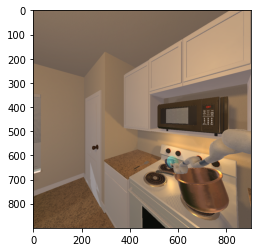

3


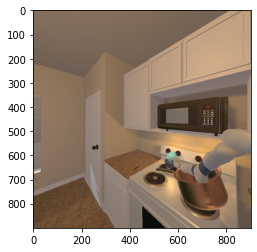

3


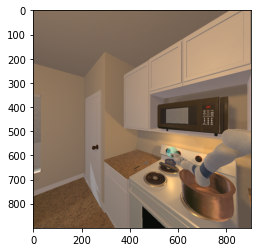

m


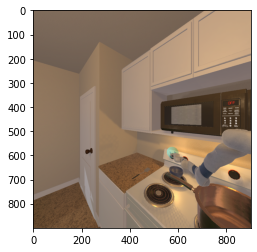

4


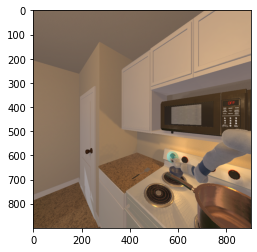

4


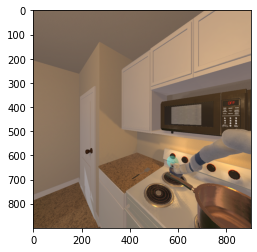

4


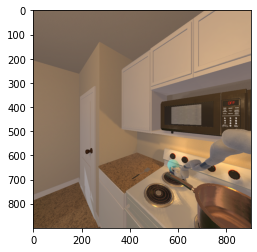

4


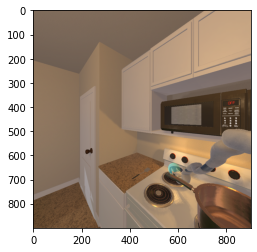

4


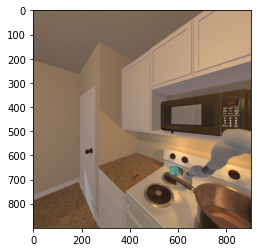

q
FloorPlan15_physics
['r', 'r', 'm', 'm', 'm', 'm', 'm', 'l', 'l', 'j', 'j', 'j', 'j', 'j', 'm', 'm', 'z', 'z', 'z', 'm', 'm', 'z', 'z', 'm', 'w', 'w', 'w', 'w', 'w', 'w', 'u', 'w', 'w', 'w', 'w', 'w', 'w', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'w', 'w', 'w', 'z', 'z', 'u', 'u', 'u', 'w', 'w', 'w', 'u', 'u', 'u', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', '4', '4', '4', '4', '4', '4', '4', '', '4', '4', '3', '3', 'm', '4', '4', '4', '4', '4']


In [31]:
CAM_POS = dict(rotation=dict(x=0, y=-40, z=0),position=dict(x=-1.4, y=1.7, z=0.7))
manual_task(scene_name='FloorPlan15_physics', reverse=True, camera_position=CAM_POS, reset_scene=False)
seq=['r', 'r', 'm', 'm', 'm', 'm', 'm', 'l', 'l', 'j', 'j', 'j', 'j', 'j', 'm', 'm', 'z', 'z', 'z', 'm', 'm', 'z', 'z', 'm', 'w', 'w', 'w', 'w', 'w', 'w', 'u', 'w', 'w', 'w', 'w', 'w', 'w', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'w', 'w', 'w', 'z', 'z', 'u', 'u', 'u', 'w', 'w', 'w', 'u', 'u', 'u', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', '4', '4', '4', '4', '4', '4', '4', '', '4', '4', '3', '3', 'm', '4', '4', '4', '4', '4']


#### [o for o in controller.last_event.metadata['objects'] if 'Stove' in o['objectType']]
random_location = random.choice(get_receptacle_locations('StoveBurner|-03.42|+00.96|+01.97'))
object_id = 'Bowl|-03.23|+00.90|+01.29'
transport_wrapper(controller, object_id, random_location)

In [28]:
[o for o in controller.last_event.metadata['objects'] if o['objectType'] == 'Bowl']

[{'name': 'Bowl_5c7a8a76',
  'position': {'x': -3.226623296737671,
   'y': 0.9038978219032288,
   'z': 1.2937004566192627},
  'rotation': {'x': 0.015775755047798157,
   'y': -0.0003992176498286426,
   'z': 359.9901123046875},
  'visible': False,
  'isInteractable': False,
  'receptacle': True,
  'toggleable': False,
  'isToggled': False,
  'breakable': False,
  'isBroken': False,
  'canFillWithLiquid': True,
  'isFilledWithLiquid': False,
  'fillLiquid': None,
  'dirtyable': True,
  'isDirty': False,
  'canBeUsedUp': False,
  'isUsedUp': False,
  'cookable': False,
  'isCooked': False,
  'temperature': 'RoomTemp',
  'isHeatSource': False,
  'isColdSource': False,
  'sliceable': False,
  'isSliced': False,
  'openable': False,
  'isOpen': False,
  'openness': 0.0,
  'pickupable': True,
  'isPickedUp': False,
  'moveable': False,
  'mass': 0.4699999988079071,
  'salientMaterials': ['Plastic'],
  'receptacleObjectIds': [],
  'distance': 1.8655319213867188,
  'objectType': 'Bowl',
  'objec

In [ ]:
ENV_ARGS['commit_id'] = 'a84dd29471ec2201f583de00257d84fac1a03de2'
controller = ai2thor.controller.Controller(**ENV_ARGS, renderDepthImage=True, renderInstanceSegmentation=True)
print(controller.last_event.metadata['arm']['handSphereCenter'])
controller.last_event.metadata['arm']['joints'][-1]

In [ ]:
#From prev
print(controller.last_event.metadata['arm']['handSphereCenter'])
print('--------')
print(controller.last_event.metadata['arm']['joints'][-1])
print('--------')
print(controller.last_event.metadata['arm']['joints'][0])

In [ ]:
#From now
print(controller.last_event.metadata['arm']['handSphereCenter'])
print('--------')
print(controller.last_event.metadata['arm']['joints'][-1])
print('--------')
print(controller.last_event.metadata['arm']['joints'][0])

In [ ]:
controller.reset('FloorPlan2');controller.step('RotateRight');controller.step('MoveArmBase', y=1);controller.step('MoveArm', position=dict(x=0,y=0,z=1));controller.step('Pass');controller.last_event.metadata['arm']['joints'][-1]